In [4]:
#-----------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
import time as t
from datetime import datetime, timedelta, date 
from dateutil.relativedelta import *
from netCDF4 import Dataset   
import glob
import requests 
import pandas as pd
import xarray as xr
import requests 
import functools
import operator
import wget
import os
import gc
import numpy as np
import pygrib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
import datetime
import holidays
import xarray as xr


import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import shapefile
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import cartopy, cartopy.crs as ccrs   
import regionmask
from shapely.geometry import Point, Polygon

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker 
import scipy.ndimage as ndimage
from PIL import Image
from glob import glob


#-----METPY---------------------
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:

files= glob('/mnt/c/scripts/temas/stream_plot/dados_grib//psi200_01*.grb2')
li = sorted(files)
li

['/mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052500.grb2',
 '/mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052600.grb2',
 '/mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052700.grb2',
 '/mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052800.grb2',
 '/mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052900.grb2',
 '/mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023053000.grb2',
 '/mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023053100.grb2']

In [50]:
data_atual = datetime.datetime.now().date()

start_time = data_atual  #+ relativedelta(months=1)

end_time = start_time + relativedelta(months=7) 

#Referencias
start =  pd.to_datetime(start_time, format='%Y-%m')

end = pd.to_datetime(end_time, format='%Y-%m')


date_range = pd.date_range(start_time,end_time, freq='6H').strftime('%Y-%m-%d %H')

In [51]:
date_range

Index(['2023-06-01 00', '2023-06-01 06', '2023-06-01 12', '2023-06-01 18',
       '2023-06-02 00', '2023-06-02 06', '2023-06-02 12', '2023-06-02 18',
       '2023-06-03 00', '2023-06-03 06',
       ...
       '2023-12-29 18', '2023-12-30 00', '2023-12-30 06', '2023-12-30 12',
       '2023-12-30 18', '2023-12-31 00', '2023-12-31 06', '2023-12-31 12',
       '2023-12-31 18', '2024-01-01 00'],
      dtype='object', length=857)

In [54]:
membro = li[0].split("_")[3]

dataset = xr.open_dataset(li[0])

dataset = dataset.assign_coords({'number':membro})

dataset = dataset.swap_dims({"step": "valid_time"}).drop(['step','isobaricInhPa']) #transforma valid_time em dim e retira a coord step

valid_time = dataset.valid_time

ds = dataset.sel(valid_time = date_range)

group1 = ds.groupby('valid_time.month').mean()
group1 =group1.to_dataframe()

In [55]:
membro = li[2].split("_")[3]

dataset = xr.open_dataset(li[2])

dataset = dataset.assign_coords({'number':membro})

dataset = dataset.swap_dims({"step": "valid_time"}).drop(['step','isobaricInhPa']) #transforma valid_time em dim e retira a coord step

valid_time = dataset.valid_time

ds = dataset.sel(valid_time = date_range)

group2 = ds.groupby('valid_time.month').mean()
group2 = group2.to_dataframe()

In [61]:
df_concat= pd.concat([group1,group2], axis=0)


In [62]:
df_concat.time.unique()

<DatetimeArray>
['2023-05-25 00:00:00', '2023-05-27 00:00:00']
Length: 2, dtype: datetime64[ns]

In [69]:
med_mensal = df_concat.groupby(['month']).mean('time')

In [70]:
med_mensal

,strf
month,
1,-1.578659e+06
6,9.778851e+06
7,1.125792e+07
8,1.064849e+07
9,8.364652e+06
10,5.726113e+06
11,2.740374e+06
12,-6.581802e+05


In [100]:
#Date range de previsões entre as rodadas 

data_atual = datetime.datetime.now().date()

start_time = data_atual + relativedelta(months=1)

end_time = start_time + relativedelta(months=7) 



#Referencias
start =  pd.to_datetime(start_time, format='%Y-%m')

end = pd.to_datetime(end_time, format='%Y-%m')


date_range = pd.date_range(start_time,end_time, freq='6H').strftime('%Y-%m-%d %H')

data_list = []

#--------- Loop------------------------------- 
for q in li:

    membro = q.split("_")[3]

    dataset = xr.open_dataset(q)

    dataset = dataset.assign_coords({'number':membro})
    
    dataset = dataset.swap_dims({"step": "valid_time"}).drop(['step','isobaricInhPa']) #transforma valid_time em dim e retira a coord step
    
    valid_time = dataset.valid_time

    ds = dataset.sel(valid_time = date_range)

    group = ds.groupby('valid_time.month').mean()

    # ds = group.to_dataframe()

    data_list.append(group)

    print(f" Read: {membro} {q}")
# -------------------------------------------

# Média mensal de psi
df_concat= xr.concat(data_list,dim='time')
mensal_med_psi = df_concat.strf.mean(dim='time')    


 Read: 01 /mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052500.grb2
 Read: 01 /mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052600.grb2
 Read: 01 /mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052700.grb2
 Read: 01 /mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052800.grb2
 Read: 01 /mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023052900.grb2
 Read: 01 /mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023053000.grb2
 Read: 01 /mnt/c/scripts/temas/stream_plot/dados_grib/psi200_01_2023053100.grb2


In [134]:
df_concat= xr.concat(data_list,dim='time')
mensal_med_psi = df_concat.strf.mean(dim='time')

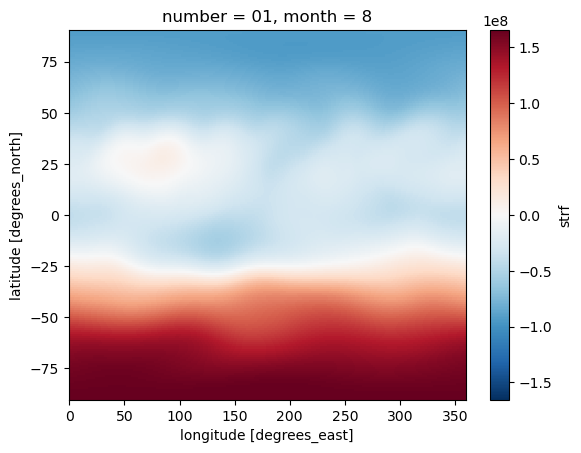

In [143]:
mensal_med_psi.sel(month = 8).plot()